In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = np.genfromtxt("CMAQ_H2O2.dat", dtype=str)
Header = (data[0,:]).tolist()
solTchem = (data[1:,:]).astype(np.float)

/var/folders/np/m42416h166j90krvxmfl40940000gp/T/ipykernel_49125/2278380608.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  solTchem = (data[1:,:]).astype(np.float)


In [13]:
campsol = np.loadtxt("CMAQ_H2O2_results.txt")

In [14]:
A_indx = Header.index('A')
B_indx = Header.index('B')
C_indx = Header.index('C')
t_indx = Header.index('t')

In [15]:
niterT, Nvars = np.shape(solTchem)
Nsamples = len(np.where(solTchem[:,0]==-1)[0])
print('Number of Cells:',Nsamples)
print('Number of time iterations:',niterT/Nsamples)
solTchem = solTchem.reshape( int(niterT/Nsamples), Nsamples,Nvars)

Number of Cells: 1
Number of time iterations: 127.0


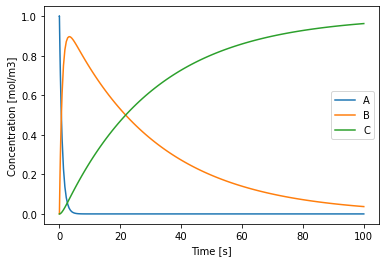

In [16]:
sp=0 # cell number 0, camp only saved cell No 1 
plt.figure()
plt.plot(solTchem[:,sp,t_indx],solTchem[:,sp,A_indx], label="A")
plt.plot(solTchem[:,sp,t_indx],solTchem[:,sp,B_indx], label="B")
plt.plot(solTchem[:,sp,t_indx],solTchem[:,sp,C_indx], label="C")
plt.xlabel('Time [s]')
plt.ylabel('Concentration [mol/m3]')
plt.legend(loc='best')

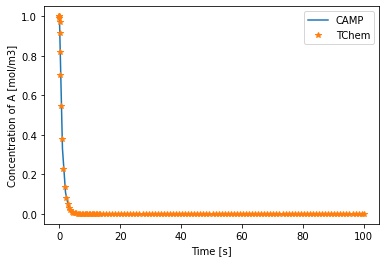

In [17]:
plt.figure()
plt.plot(campsol[:,0],campsol[:,1],label='CAMP')
plt.plot(solTchem[:,sp,t_indx],solTchem[:,sp,A_indx],"*",label='TChem')
plt.xlabel('Time [s]')
plt.ylabel('Concentration of A [mol/m3]')
plt.legend(loc='best')


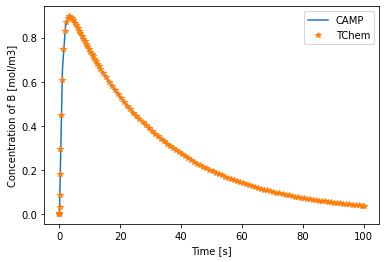

In [18]:
plt.figure()
plt.plot(campsol[:,0],campsol[:,3],label='CAMP')
plt.plot(solTchem[:,sp,t_indx],solTchem[:,sp,B_indx],"*",label='TChem')
plt.xlabel('Time [s]')
plt.ylabel('Concentration of B [mol/m3]')
plt.legend(loc='best')

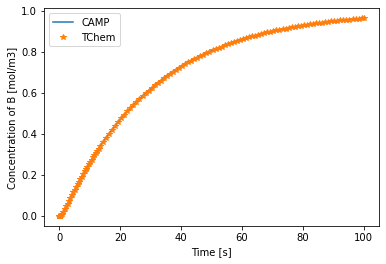

In [19]:
plt.figure()
plt.plot(campsol[:,0],campsol[:,5],label='CAMP')
plt.plot(solTchem[:,sp,t_indx],solTchem[:,sp,C_indx],"*",label='TChem')
plt.xlabel('Time [s]')
plt.ylabel('Concentration of B [mol/m3]')
plt.legend(loc='best')